In [289]:

import importlib
import data_prep as dp
import macro_utils
import pandas as pd
importlib.reload(dp)
importlib.reload(macro_utils)
print(dir(dp))  # Check if functions appear now
import matplotlib.pyplot as plt

Device set to use mps:0


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_sentiment', 'calculate_sentiment_stats', 'datetime', 'download_vix_data', 'load_data', 'load_macro_df', 'macro_analysis', 'merge_dataframes', 'micro_analysis', 'np', 'pd', 'pipe', 'pipeline', 're', 'sort_by_date', 'tqdm', 'yf']


In [3]:
#optional
#df = dp.macro_analysis('./../clean_macro_5y_news_1kcap.csv', 'description', 'title')

# OPTIONAL: concat recent news with existing df for trading.

In [447]:
df_live = dp.macro_analysis('./../clean_macro_4-10-25_to_17_news.csv', 'description', 'title')

Step 1: Loading data
Available columns in CSV: ['topic', 'title', 'description', 'source', 'published_at', 'url']
Columns after loading: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Data shape after loading: (2503, 7)
Step 2: Sorting by date
Min date: 2025-04-09 00:00:00, Max date: 2025-04-17 00:00:00
Columns after sorting: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date']
Step 3: Calculating summary sentiment
Analyzing sentiment for 2503 entries in column 'description'...


Sentiment analysis for 'description': 100%|██████████| 2503/2503 [00:33<00:00, 74.37it/s] 


Columns after summary sentiment: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary']
Step 4: Calculating headline sentiment
Analyzing sentiment for 2503 entries in column 'title'...


Sentiment analysis for 'title': 100%|██████████| 2503/2503 [00:29<00:00, 85.62it/s] 
[*********************100%***********************]  1 of 1 completed

Columns after headline sentiment: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary', 'title_sentiment_headline', 'title_sentiment_label_headline']
Step 5: Calculating sentiment stats
Inside calculate_sentiment_stats
Input df shape: (2503, 11)
Input columns: ['topic', 'title', 'description', 'source', 'published_at', 'url', 'date', 'description_sentiment_summary', 'description_sentiment_label_summary', 'title_sentiment_headline', 'title_sentiment_label_headline']
Date min: 2025-04-09 00:00:00, max: 2025-04-17 00:00:00
Filtered df shape: (2503, 11)
Looking for columns: description_sentiment_summary and title_sentiment_headline
Output columns: ['date', 'summary_mean', 'summary_min', 'summary_max', 'summary_pos_count', 'summary_neg_count', 'headline_mean', 'headline_min', 'headline_max', 'headline_pos_count', 'headline_neg_count', 'overall_mean', 'overall_min', 'overall_max', 'overall_pos_count'

In [448]:
df = pd.read_csv('./../data/Sentiment Macro 7Y News 2.5K Cap.csv') #adjust for live/most recent df news under /data/live

In [449]:
df_live.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
3,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,28,-0.049076,-0.949604,0.943812,195,71,30.889999
4,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,34,-0.122375,-0.970495,0.952528,145,65,30.889999
5,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,154,-0.141765,-0.972986,0.944689,447,277,30.889999
6,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,103,-0.156347,-0.974737,0.949450,376,220,30.120001
7,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,127,-0.209701,-0.974891,0.951529,452,296,32.639999


In [450]:
# Ensure 'date' columns are datetime
df['date'] = pd.to_datetime(df['date'])
df_live['date'] = pd.to_datetime(df_live['date'])

# Remove overlap: drop April 10 from df_live if it exists in df
df_live_trimmed = df_live[df_live['date'] > df['date'].max()]

# Merge the two
df = pd.concat([df, df_live_trimmed], ignore_index=True)


In [452]:
df = df.drop(columns=['Unnamed: 0'])

In [453]:
df.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,headline_neg_count,overall_mean,overall_min,overall_max,overall_pos_count,overall_neg_count,vix_target
1957,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,28,-0.049076,-0.949604,0.943812,195,71,30.889999
1958,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,34,-0.122375,-0.970495,0.952528,145,65,30.889999
1959,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,154,-0.141765,-0.972986,0.944689,447,277,30.889999
1960,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,103,-0.156347,-0.974737,0.949450,376,220,30.120001
1961,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,127,-0.209701,-0.974891,0.951529,452,296,32.639999


In [485]:
import statsmodels.api as sm
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

df = macro_utils.calculate_stats(df)
df.to_csv('./../data/live/7y_up_to_4_17_2025_news.csv')



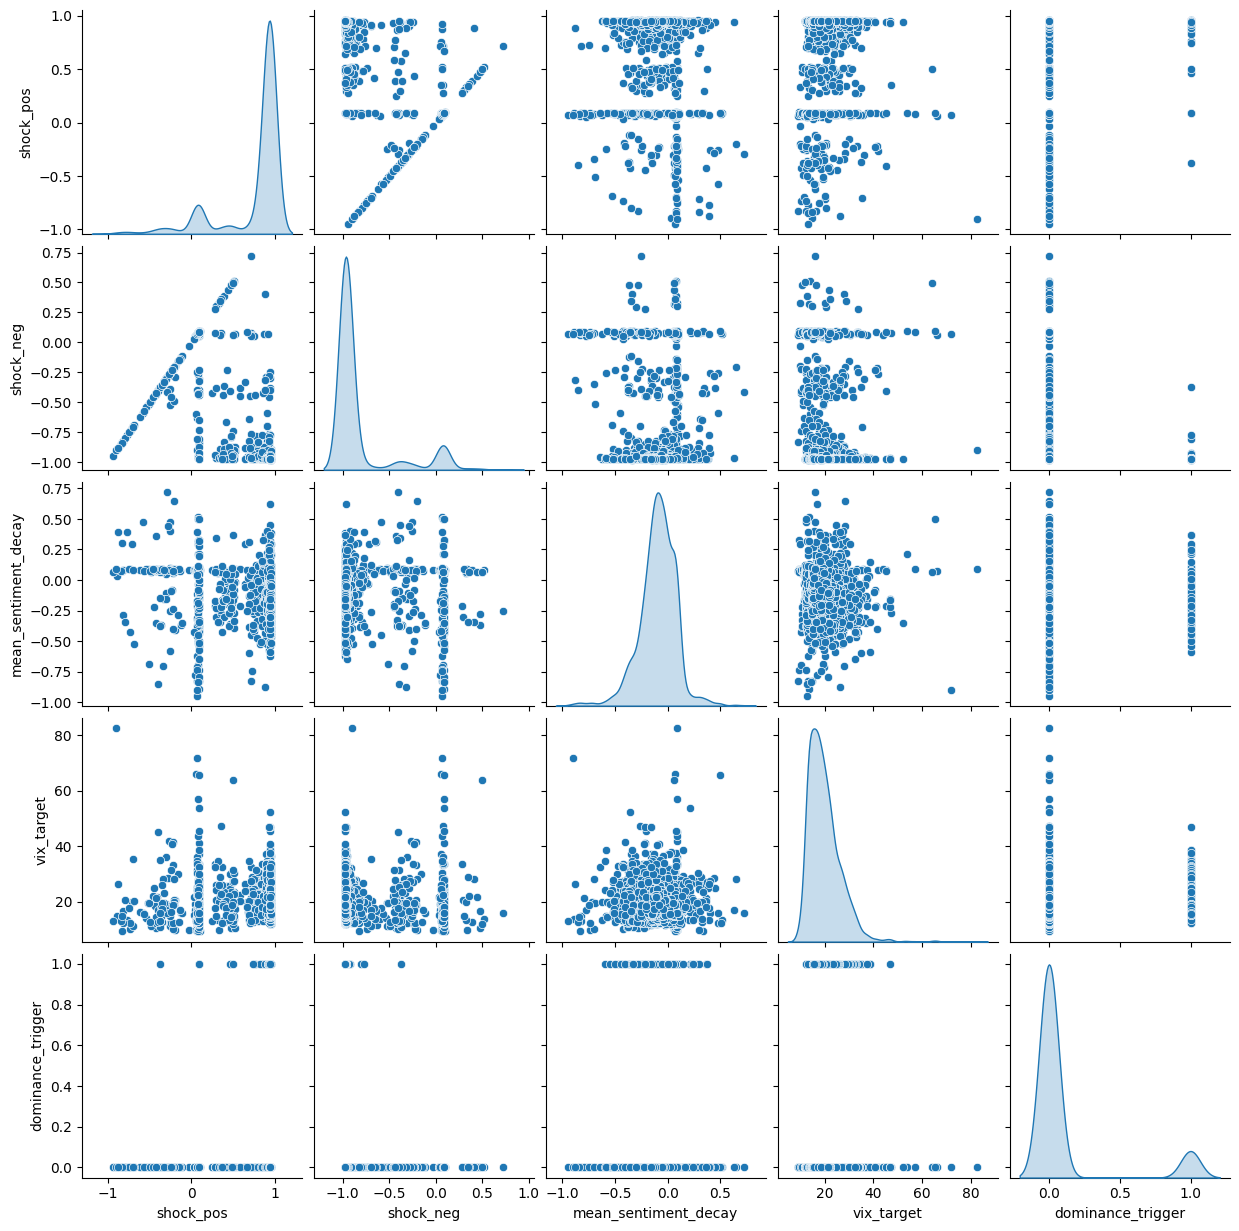

In [455]:
import seaborn as sns
sns.pairplot(df, vars=['shock_pos', 'shock_neg', 'mean_sentiment_decay', 'vix_target', 'dominance_trigger'], diag_kind='kde')


In [384]:
feature_sets = [ #for testing, winner was the first one, decreasing in quality for this model sequentially
    ['shock_neg', 'dominance_trigger'],
    ['shock_neg', 'sentiment_dominance'],
    ['shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_pos', 'shock_neg', 'sentiment_dominance', 'overall_min'],
    ['shock_pos', 'shock_neg', 'mean_sentiment_decay', 'overall_min', 'sentiment_dominance']
]
selected_features = feature_sets[0]

In [459]:
df.index = pd.to_datetime(df['date'])
df.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,overall_pos_count,overall_neg_count,vix_target,mean_sentiment_decay,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore
date,,,,,,,,,,,,,,,,,,,,,
2025-04-12,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,...,195,71,30.889999,-0.304711,0.943812,-0.949604,47,0,0.426790,0.340215
2025-04-13,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,...,145,65,30.889999,-0.049076,0.952528,-0.970495,43,0,0.386445,0.313508
2025-04-14,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,...,447,277,30.889999,-0.122375,0.944689,-0.972986,116,0,0.386445,0.283756
2025-04-15,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,...,376,220,30.120001,-0.141765,0.949450,-0.974737,64,0,0.351885,0.185777
2025-04-16,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,...,452,296,32.639999,-0.156347,0.951529,-0.974891,36,0,0.499311,0.382230


In [461]:



# Train: Post-COVID to end of 2023
train_df = df[(df.index >= "2020-06-01") & (df.index <= "2023-12-31")]
# Test: Recent years
test_df = df[df.index >= "2024-01-01"]
print(f"Train set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

df_model = train_df.dropna(subset=feature_sets[0] + ['vix_target']).copy() #i chose first set.
X = df_model[feature_sets[0]]
y = df_model['vix_target']


Train set: 1204 rows
Test set: 465 rows


In [462]:
test_df.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,overall_pos_count,overall_neg_count,vix_target,mean_sentiment_decay,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore
date,,,,,,,,,,,,,,,,,,,,,
2025-04-12,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,...,195,71,30.889999,-0.304711,0.943812,-0.949604,47,0,0.426790,0.340215
2025-04-13,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,...,145,65,30.889999,-0.049076,0.952528,-0.970495,43,0,0.386445,0.313508
2025-04-14,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,...,447,277,30.889999,-0.122375,0.944689,-0.972986,116,0,0.386445,0.283756
2025-04-15,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,...,376,220,30.120001,-0.141765,0.949450,-0.974737,64,0,0.351885,0.185777
2025-04-16,2025-04-16,-0.254442,-0.974785,0.947952,205,169,-0.164961,-0.974998,0.955106,247,...,452,296,32.639999,-0.156347,0.951529,-0.974891,36,0,0.499311,0.382230


In [391]:
transition_matrix, results, df_model = macro_utils.regime_t_markov_model(X, y, df_model)

/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


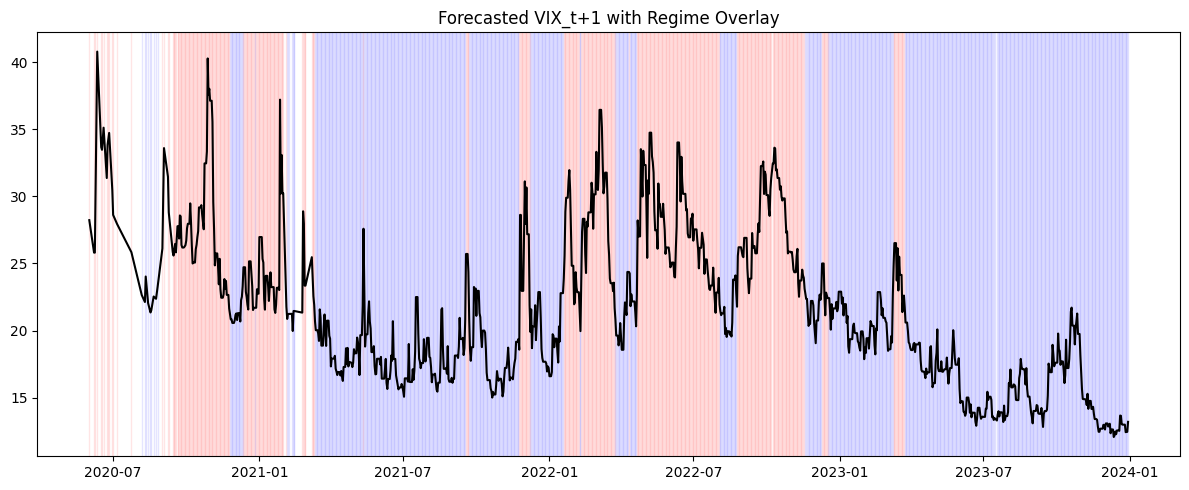

In [392]:
import matplotlib.pyplot as plt #graph vix t+1 with regime overlay

plt.figure(figsize=(12, 5))
plt.plot(df_model.index, df_model['vix_target'], label='VIX_t', color='black')

for i in range(len(df_model)):
    color = 'red' if df_model['regime_t+1'].iloc[i] == 1 else 'blue'
    plt.axvspan(df_model.index[i], df_model.index[i], color=color, alpha=0.1)

plt.title('Forecasted VIX_t+1 with Regime Overlay')
plt.tight_layout()
plt.show()


In [393]:
df_model.head()

,Unnamed: 0,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,...,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,regime_t,regime_t_raw,regime_t+1,regime_t+1_raw
date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,293.0,2020-06-01,0.092641,0.092641,0.092641,1,0,0.092438,0.092438,0.092438,...,0.092540,0.092540,1,0,-0.505431,-0.674382,1,0.867443,1.0,0.896374
2020-06-07,294.0,2020-06-07,0.088074,0.088074,0.088074,1,0,0.087048,0.087048,0.087048,...,0.087561,0.087561,1,0,-0.429487,-0.854666,1,0.896374,1.0,0.975543
2020-06-08,295.0,2020-06-08,-0.248316,-0.910594,0.089416,2,1,0.078985,0.055655,0.091886,...,0.090651,-0.427470,1,0,-0.380610,-0.900085,1,0.975543,1.0,1.000000
2020-06-11,296.0,2020-06-11,0.052232,0.052232,0.052232,1,0,-0.510630,-0.510630,-0.510630,...,-0.229199,-0.229199,1,0,-0.009230,-0.054633,1,1.000000,1.0,0.999974
2020-06-16,297.0,2020-06-16,0.084131,0.084131,0.084131,2,0,0.092482,0.092482,0.092482,...,0.088306,0.088306,2,0,-0.231805,-0.559804,1,0.999974,1.0,0.999970


In [394]:
clf, y_pred, classification_df = macro_utils.clf_panic_tomorrow(df_model, selected_features, 'regime_t+1')

              precision    recall  f1-score   support

         0.0       0.69      0.99      0.81       761
         1.0       0.92      0.22      0.35       442

    accuracy                           0.71      1203
   macro avg       0.80      0.60      0.58      1203
weighted avg       0.77      0.71      0.64      1203



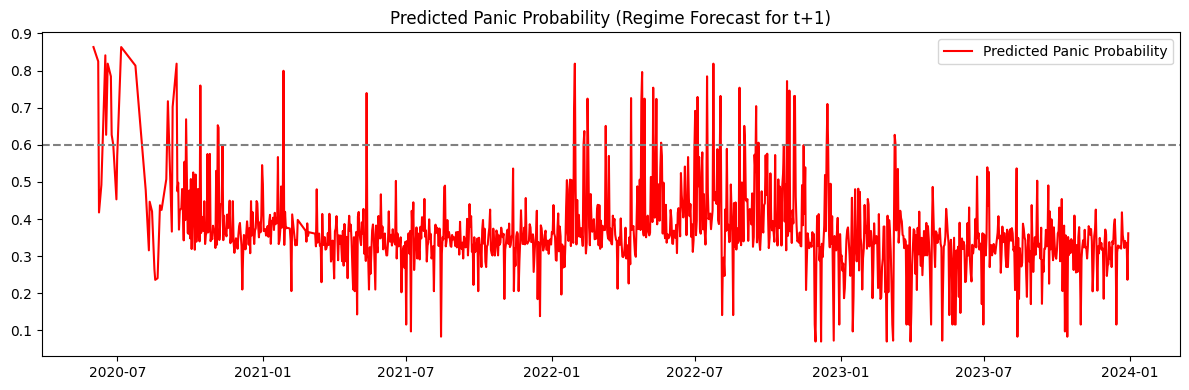

In [395]:
plt.figure(figsize=(12, 4))
plt.plot(df_model.index, df_model['panic_prob'], label='Predicted Panic Probability', color='red')
plt.axhline(0.6, linestyle='--', color='gray')
plt.title("Predicted Panic Probability (Regime Forecast for t+1)")
plt.legend()
plt.tight_layout()
plt.show()


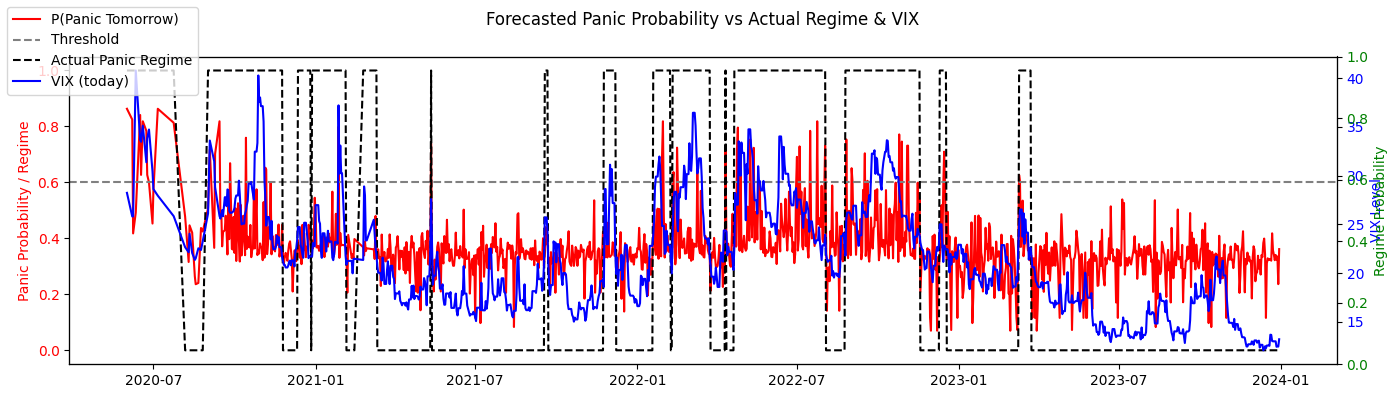

In [396]:
fig, ax1 = plt.subplots(figsize=(14, 4)) #GOLD. panic regime probability goes up before vix even spikes. probability of panic tomorrow from classifier is high.

# Panic probability
ax1.plot(classification_df.index, classification_df['panic_prob'], label='P(Panic Tomorrow)', color='red')
ax1.axhline(0.6, linestyle='--', color='gray', label='Threshold')
ax1.plot(classification_df.index, classification_df['regime_t+1'], linestyle='--', color='black', label='Actual Panic Regime')
ax1.set_ylabel("Panic Probability / Regime", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Add second y-axis for VIX
ax2 = ax1.twinx()
ax2.plot(classification_df.index, classification_df['vix_target'], label='VIX (today)', color='blue')
ax2.set_ylabel("VIX Level", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
#ax3.plot(classification_df.index, classification_df['regime_t_raw'], label='Regime Probability', color='green')
ax3.set_ylabel("Regime Probability", color='green')
ax3.tick_params(axis='y', labelcolor='green')

fig.suptitle("Forecasted Panic Probability vs Actual Regime & VIX")
fig.tight_layout()
fig.legend(loc='upper left')
plt.show()
import matplotlib.dates as mdates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()


for each regime=1, we now get the set of days aferwards to see how vix behaves as soon as the model changes regime

In [397]:

# Train dataset (classification_df)
classification_df = macro_utils.identify_sustained_regimes_and_transitions(classification_df)

# Now you can apply it to the test data (test_df) in the same way:




In [398]:

# Usage Example:
result = macro_utils.transform_vix_data(classification_df, window=60)
vix_windows_df_train = result["vix_windows_df_train"]
regime_windows_df_train = result["regime_windows_df_train"]
vix_windows_past_df_train = result["vix_windows_past_df_train"]


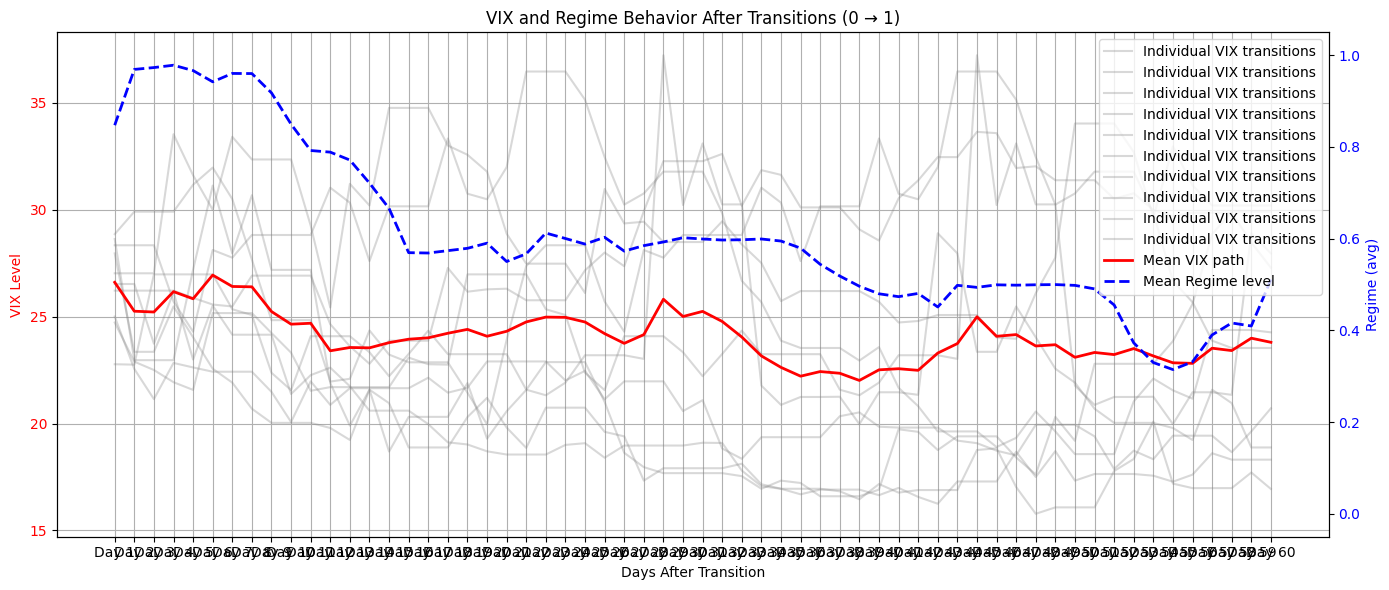

In [399]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_train.T, color="gray", alpha=0.3, label="Individual VIX transitions")
ax1.plot(vix_windows_df_train.mean(axis=0).values, color="red", linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_train.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()



since some spikes happen quite some time after the regime switches, we will build a classifier for 0 (immediate) or 1 (delayed), then feed this into a model for vix level forecasting

In [400]:
vix_windows_df_train.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 51,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60
transition_time,,,,,,,,,,,,,,,,,,,,,
2020-12-13,24.719999,22.889999,22.500000,21.930000,21.570000,25.160000,25.160000,25.160000,24.230000,23.309999,...,20.870001,21.240000,21.240000,21.250000,19.969999,21.459999,21.459999,21.340000,28.889999,27.950001
2020-12-29,22.770000,22.750000,26.969999,26.969999,26.969999,26.969999,25.340000,25.070000,22.370001,21.559999,...,20.690001,20.030001,20.030001,20.030001,19.790001,19.230000,21.580000,20.950001,18.879999,18.879999
2021-02-25,27.950001,23.350000,23.350000,25.469999,24.030001,22.559999,21.910000,20.690001,20.030001,20.030001,...,17.639999,17.639999,17.639999,17.559999,17.280001,17.610001,18.610001,18.309999,18.309999,18.309999
2021-11-25,28.620001,22.959999,22.959999,22.959999,27.190001,31.120001,27.950001,30.670000,27.180000,27.180000,...,22.790001,22.790001,22.790001,22.790001,23.850000,25.590000,28.850000,29.900000,29.900000,29.900000
2022-01-20,28.850000,29.900000,29.900000,29.900000,31.160000,31.959999,30.490000,27.660000,24.830000,24.830000,...,31.770000,31.770000,31.770000,29.830000,26.670000,25.670000,23.870001,23.530001,23.530001,23.530001


In [401]:
df_delayed_spike_prob = macro_utils.clf_delayed_spike_prob(vix_windows_df_train, df_model, "vix_target")

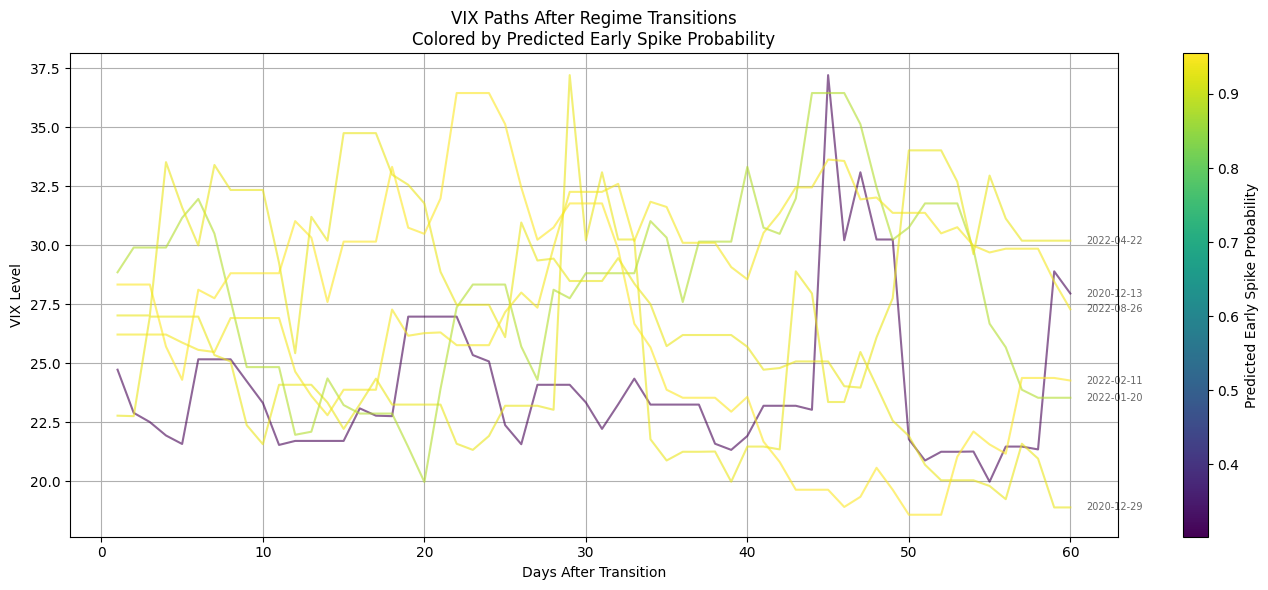

In [402]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [403]:
vix_windows_df_train

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2020-12-13,24.719999,22.889999,22.500000,21.930000,21.570000,25.160000,25.160000,25.160000,24.230000,23.309999,...,21.240000,21.240000,21.250000,19.969999,21.459999,21.459999,21.340000,28.889999,27.950001,0.3025
2020-12-29,22.770000,22.750000,26.969999,26.969999,26.969999,26.969999,25.340000,25.070000,22.370001,21.559999,...,20.030001,20.030001,20.030001,19.790001,19.230000,21.580000,20.950001,18.879999,18.879999,0.9325
2021-02-25,27.950001,23.350000,23.350000,25.469999,24.030001,22.559999,21.910000,20.690001,20.030001,20.030001,...,17.639999,17.639999,17.559999,17.280001,17.610001,18.610001,18.309999,18.309999,18.309999,NaN
2021-11-25,28.620001,22.959999,22.959999,22.959999,27.190001,31.120001,27.950001,30.670000,27.180000,27.180000,...,22.790001,22.790001,22.790001,23.850000,25.590000,28.850000,29.900000,29.900000,29.900000,NaN
2022-01-20,28.850000,29.900000,29.900000,29.900000,31.160000,31.959999,30.490000,27.660000,24.830000,24.830000,...,31.770000,31.770000,29.830000,26.670000,25.670000,23.870001,23.530001,23.530001,23.530001,0.8800
2022-02-11,28.330000,28.330000,28.330000,25.700001,24.290001,28.110001,27.750000,28.809999,28.809999,28.809999,...,18.570000,21.030001,22.100000,21.549999,21.160000,24.370001,24.370001,24.370001,24.260000,0.9550
2022-04-22,27.020000,27.020000,27.020000,33.520000,31.600000,29.990000,33.400002,32.340000,32.340000,32.340000,...,34.020000,32.689999,29.620001,32.950001,31.129999,30.190001,30.190001,30.190001,30.190001,0.9325
2022-08-26,26.209999,26.209999,26.209999,26.209999,25.870001,25.559999,25.469999,26.910000,26.910000,26.910000,...,30.500000,30.760000,29.980000,29.690001,29.850000,29.850000,29.850000,28.459999,27.280001,0.9425
2022-12-11,25.000000,22.549999,21.139999,22.830000,22.620001,22.420000,22.420000,22.420000,21.480000,20.070000,...,17.870001,18.730000,18.330000,19.430000,19.430000,19.430000,18.660000,19.629999,20.709999,NaN


because of randomness, we will just predict peak, half decay time, and rising time.

In [405]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news = train_df.copy()                       # original df you posted   # string/ts column → index
news = news.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        pos = f'{prefix}_pos_count'
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

        out[tot] = out[[pos, neg]].sum(axis=1).replace(0, 1)      # avoid ÷0
        out[f'{prefix}_pos_ratio'] = out[pos] / out[tot]
        out[f'{prefix}_neg_ratio'] = out[neg] / out[tot]
        out[f'{prefix}_range']     = out[f'{prefix}_max'] - out[f'{prefix}_min']

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats = engineer_news_feats(news)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats.index = pd.to_datetime(news_feats.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats.index.min(),
                          news_feats.index.max(),
                          freq='D')

news_dense = (
    news_feats
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_9552/1448525528.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .ffill()                 # carry last known sentiment forward


In [406]:
# ------------------------------------------------------------
# 3)  BUILD ARC‑LEVEL TABLE  (robust to missing news dates)
# ------------------------------------------------------------
records = []
for dt, row in vix_windows_df_train.iterrows():
    v = row[[f'Day {i}' for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc(v)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur            = peak_idx - start_idx
    decay_idx           = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life           = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest‑past news features --------
    try:
        feats_on_start = news_dense.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    records.append({
        "date_start": dt_norm,
        "peak_vix":  peak_val,
        "vix0":      start_val,
        "P_rel":     peak_val / start_val - 1,
        "T_up":      rise_dur,
        "T_half":    half_life,
        **feats_on_start
    })

arc_df = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)
print(arc_df.head(3).T)


arc_df shape: (10, 41)
date_start                     2020-12-13           2020-12-29  \
peak_vix                        37.209999            37.209999   
vix0                                21.32                21.32   
P_rel                             0.74531              0.74531   
T_up                                  6.0                  6.0   
T_half                               16.0                 32.0   
Unnamed: 0                          409.0                425.0   
date                  2020-12-13 00:00:00  2020-12-29 00:00:00   
summary_mean                    -0.245209            -0.010648   
summary_min                     -0.964348            -0.964163   
summary_max                       0.79501             0.935617   
summary_pos_count                    61.0                280.0   
summary_neg_count                    35.0                 39.0   
headline_mean                   -0.231216             0.016138   
headline_min                    -0.970489            

In [407]:
arc_df = arc_df.drop(columns=['date', 'Unnamed: 0'], axis=1)

In [487]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

target_cols   = ["peak_vix", "T_up", "T_half"]
feature_cols  = arc_df.columns.difference(target_cols)

mlp_params = dict(
    hidden_layer_sizes=(5000, 2000, 1000, 500),
    activation="relu",
    learning_rate_init=0.001,   # ↑ a bit
    alpha=1e-4,                # much weaker L2
    max_iter=5000,
    batch_size="auto",
    early_stopping=False,      # let it run full epochs
    random_state=42,
)

# ============================================================
# 1)  INPUT MATRICES & CV SPLIT
# ============================================================
X_full = arc_df[feature_cols].values
y_full = arc_df[target_cols].values
tscv   = TimeSeriesSplit(n_splits=5)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# ============================================================
# 2)  TRAIN PER‑TARGET WITH y‑SCALING
# ============================================================
models, cv_mae = {}, {}

for i, col in enumerate(target_cols):
    y = y_full[:, i]

    # pipeline: X‑scaler → MLP, plus y‑scaler wrapper
    base_pipe = Pipeline([
        ("scale_X", StandardScaler()),
        ("mlp",     MLPRegressor(**mlp_params)),
    ])
    pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        transformer=StandardScaler()     # scales y
    )

    # walk‑forward CV
    cv = cross_validate(pipe, X_full, y,
                        cv=tscv,
                        scoring=mae_scorer,
                        n_jobs=-1,
                        return_train_score=False)
    cv_mae[col] = -cv["test_score"].mean()
    print(f"{col:8s} | MAE (5-fold): {cv_mae[col]:.3f}")

    # fit on all data & save
    pipe.fit(X_full, y)
    models[col] = pipe
    joblib.dump(pipe, f"mlp_{col}.pkl")

print("\nSaved pickled models:", [f"mlp_{c}.pkl" for c in target_cols])

# ============================================================
# 3)  HELPER FOR NEW PREDICTIONS
# ============================================================
def predict_new_arc(row_df: pd.DataFrame):
    """
    row_df: DataFrame with one row and the same feature columns.
    returns dict {target: prediction}
    """
    preds = {col: float(models[col].predict(row_df[feature_cols].values))
             for col in target_cols}
    return preds

# Example:
# new_row = arc_df.iloc[[-1]]
# print(predict_new_arc(new_row))


peak_vix | MAE (5-fold): 3.308


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


T_up     | MAE (5-fold): 9.473


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


T_half   | MAE (5-fold): 17.547

Saved pickled models: ['mlp_peak_vix.pkl', 'mlp_T_up.pkl', 'mlp_T_half.pkl']


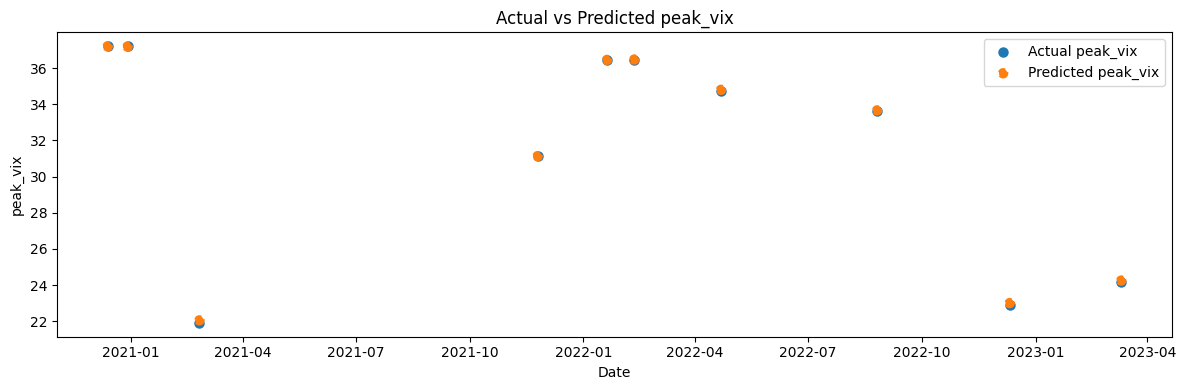

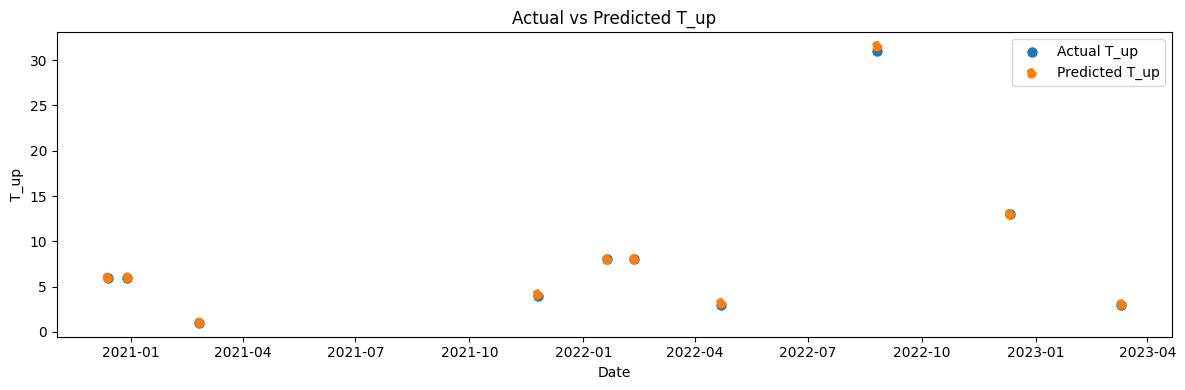

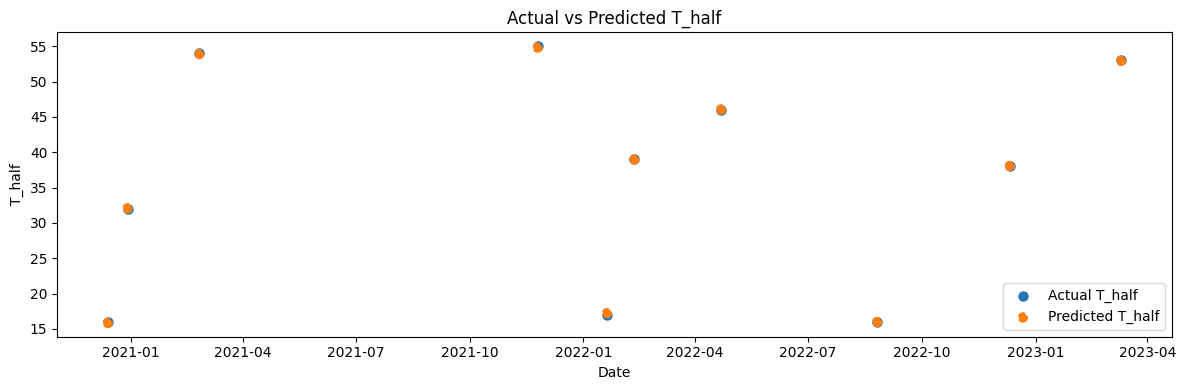

In [488]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df.columns.difference(["peak_vix", "T_up", "T_half"])
X_full       = arc_df[feature_cols].values
dates        = arc_df.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}

for target, model in models.items():
    y_true = arc_df[target].values
    y_pred = model.predict(X_full)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Test Set on models (regime + panic probability)


In [465]:
vix_windows_df_train

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2020-12-13,24.719999,22.889999,22.500000,21.930000,21.570000,25.160000,25.160000,25.160000,24.230000,23.309999,...,21.240000,21.240000,21.250000,19.969999,21.459999,21.459999,21.340000,28.889999,27.950001,0.3025
2020-12-29,22.770000,22.750000,26.969999,26.969999,26.969999,26.969999,25.340000,25.070000,22.370001,21.559999,...,20.030001,20.030001,20.030001,19.790001,19.230000,21.580000,20.950001,18.879999,18.879999,0.9325
2021-02-25,27.950001,23.350000,23.350000,25.469999,24.030001,22.559999,21.910000,20.690001,20.030001,20.030001,...,17.639999,17.639999,17.559999,17.280001,17.610001,18.610001,18.309999,18.309999,18.309999,NaN
2021-11-25,28.620001,22.959999,22.959999,22.959999,27.190001,31.120001,27.950001,30.670000,27.180000,27.180000,...,22.790001,22.790001,22.790001,23.850000,25.590000,28.850000,29.900000,29.900000,29.900000,NaN
2022-01-20,28.850000,29.900000,29.900000,29.900000,31.160000,31.959999,30.490000,27.660000,24.830000,24.830000,...,31.770000,31.770000,29.830000,26.670000,25.670000,23.870001,23.530001,23.530001,23.530001,0.8800
2022-02-11,28.330000,28.330000,28.330000,25.700001,24.290001,28.110001,27.750000,28.809999,28.809999,28.809999,...,18.570000,21.030001,22.100000,21.549999,21.160000,24.370001,24.370001,24.370001,24.260000,0.9550
2022-04-22,27.020000,27.020000,27.020000,33.520000,31.600000,29.990000,33.400002,32.340000,32.340000,32.340000,...,34.020000,32.689999,29.620001,32.950001,31.129999,30.190001,30.190001,30.190001,30.190001,0.9325
2022-08-26,26.209999,26.209999,26.209999,26.209999,25.870001,25.559999,25.469999,26.910000,26.910000,26.910000,...,30.500000,30.760000,29.980000,29.690001,29.850000,29.850000,29.850000,28.459999,27.280001,0.9425
2022-12-11,25.000000,22.549999,21.139999,22.830000,22.620001,22.420000,22.420000,22.420000,21.480000,20.070000,...,17.870001,18.730000,18.330000,19.430000,19.430000,19.430000,18.660000,19.629999,20.709999,NaN


In [490]:
# 1. After fitting on training set
train_params = results.params

# 2. Prepare your test data
test_df['vix_target_t+1'] = test_df['vix_target'].shift(-1)
test_df = test_df.dropna(subset=selected_features + ['vix_target_t+1']).copy()

X_test = test_df[selected_features]
y_test = test_df['vix_target_t+1']



# 3. Define same model on test data
model_test = MarkovRegression(
    endog=y_test,
    exog=X_test,
    k_regimes=2,
    switching_variance=False
)

# 4. Apply training parameters with FILTER (real-time regime inference)
results_test = model_test.filter(train_params)

# 5. Extract real-time regime (filtered) — sensitive threshold
test_df['regime_t'] = results_test.filtered_marginal_probabilities[1].apply(lambda p: 1 if p >= 0.005 else 0)
test_df['regime_t_raw'] = results_test.filtered_marginal_probabilities[1]

# 6. Predict probability of panic regime tomorrow using classifier (NO regime_t)
test_df['panic_prob_t+1'] = clf.predict_proba(X_test)[:, 1]

# 7. (Optional) Align as prediction for tomorrow
test_df['vix_target_t+1'] = test_df['vix_target'].shift(-1)




/Users/dsuniaga/Documents/GitHub/VIXNLP/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [467]:
test_df.tail()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,vix_target_t+1,regime_t,regime_t_raw,panic_prob_t+1
date,,,,,,,,,,,,,,,,,,,,,
2025-04-11,2025-04-11,-0.359428,-0.975735,0.952794,183,224,-0.249995,-0.970271,0.936718,226,...,0.944756,-0.973003,-41,1,1.009631,0.962974,30.889999,1,0.999967,0.420400
2025-04-12,2025-04-12,-0.089461,-0.957227,0.948515,90,43,-0.008691,-0.941981,0.939109,105,...,0.943812,-0.949604,47,0,0.426790,0.340215,30.889999,1,0.999990,0.392826
2025-04-13,2025-04-13,-0.086733,-0.972444,0.952317,74,31,-0.158017,-0.968547,0.952738,71,...,0.952528,-0.970495,43,0,0.386445,0.313508,30.889999,1,0.999990,0.347987
2025-04-14,2025-04-14,-0.063972,-0.972737,0.948741,239,123,-0.219557,-0.973235,0.940637,208,...,0.944689,-0.972986,116,0,0.386445,0.283756,30.120001,1,0.999981,0.341404
2025-04-15,2025-04-15,-0.174286,-0.975042,0.950775,181,117,-0.138407,-0.974432,0.948124,195,...,0.949450,-0.974737,64,0,0.351885,0.185777,NaN,1,0.999998,0.337378


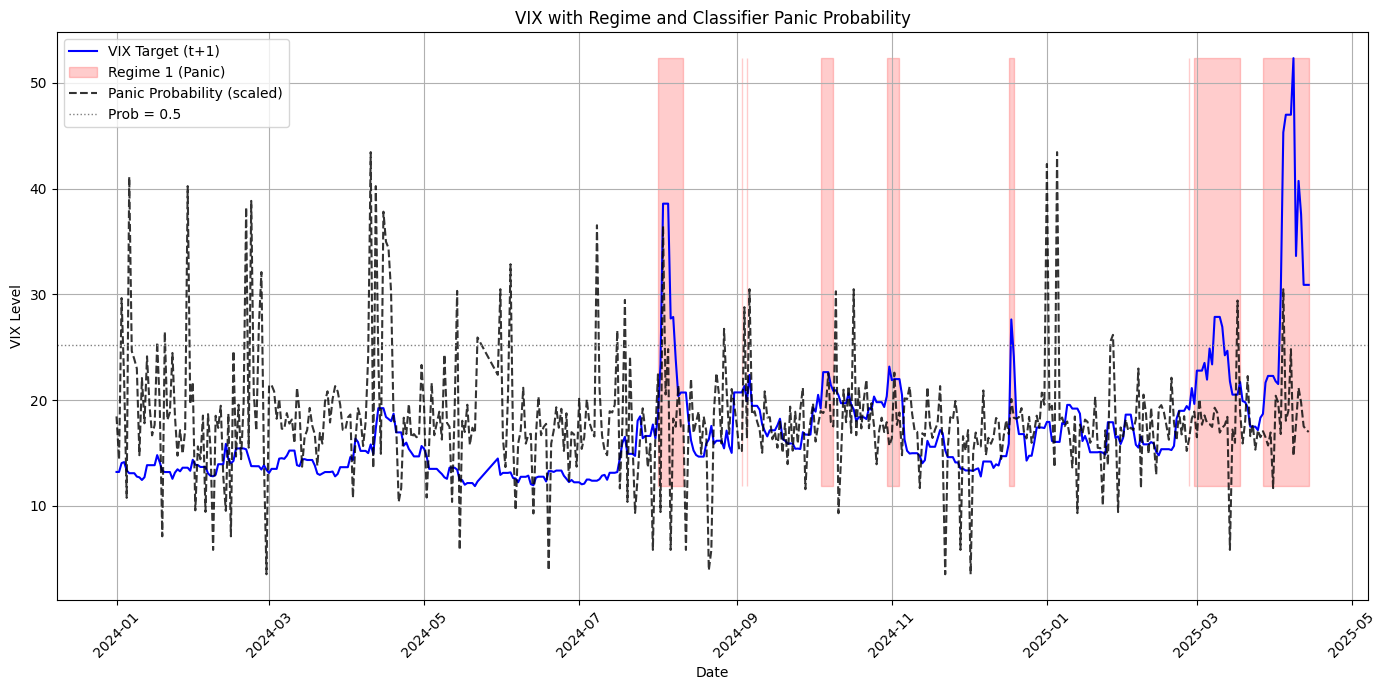

In [491]:
import matplotlib.pyplot as plt

# Assumes test_df already has:
# - 'vix_target_t+1' (VIX values)
# - 'regime_t' (real-time inferred regime: 0 or 1)
# - 'panic_prob_t+1' (classifier probability of panic tomorrow)

plt.figure(figsize=(14, 7))

# 1. Plot VIX
plt.plot(test_df.index, test_df["vix_target"], label="VIX Target (t+1)", color="blue")

# 2. Shade areas where regime is 1 (panic)
plt.fill_between(
    test_df.index,
    test_df["vix_target"].min(),
    test_df["vix_target"].max(),
    where=test_df["regime_t"] == 1,
    color="red",
    alpha=0.2,
    label="Regime 1 (Panic)"
)

# 3. Plot panic probability (scaled for visibility)
scaled_prob = test_df["panic_prob_t+1"] * (test_df["vix_target"].max() - 2)
plt.plot(test_df.index, scaled_prob, label="Panic Probability (scaled)", color="black", linestyle="--", alpha=0.8)

# Optional: Add threshold line for prob=0.5 scaled to same scale
plt.axhline(y=0.5 * (test_df["vix_target"].max() - 2), color="gray", linestyle=":", linewidth=1, label="Prob = 0.5")

# Finalize
plt.title("VIX with Regime and Classifier Panic Probability")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend(loc="upper left")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [469]:
test_df.head()

,date,summary_mean,summary_min,summary_max,summary_pos_count,summary_neg_count,headline_mean,headline_min,headline_max,headline_pos_count,...,shock_pos,shock_neg,sentiment_dominance,dominance_trigger,vix_7d_pct,vix_zscore,vix_target_t+1,regime_t,regime_t_raw,panic_prob_t+1
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,2024-01-01,0.230589,-0.975066,0.928364,3,1,0.256950,-0.707050,0.939984,3,...,0.934174,-0.841058,2,0,0.050955,1.024509,13.20,0,0.000126,NaN
2024-01-02,2024-01-02,-0.051116,-0.972233,0.934338,15,10,-0.059740,-0.932877,0.941353,16,...,0.937845,-0.952555,5,0,0.050955,1.005414,14.04,0,0.000008,0.366600
2024-01-03,2024-01-03,-0.298161,-0.972755,0.943392,31,42,-0.345787,-0.969059,0.918668,29,...,0.931030,-0.970907,-11,1,0.120511,2.639696,14.13,0,0.000004,0.285530
2024-01-04,2024-01-04,-0.376740,-0.974324,0.934698,17,34,-0.429220,-0.973915,0.948764,17,...,0.941731,-0.974120,-17,1,0.033650,2.435504,13.35,0,0.000002,0.589018
2024-01-05,2024-01-05,-0.332922,-0.973382,0.931713,17,26,0.154316,-0.970470,0.945269,32,...,0.938491,-0.971926,-9,1,-0.021978,0.889861,13.08,0,0.000002,0.435412


In [470]:
classification_df_test = macro_utils.identify_sustained_regimes_and_transitions(test_df)

In [471]:
result = macro_utils.transform_vix_data(classification_df_test, window=60)
vix_windows_df_test = result["vix_windows_df_train"]
regime_windows_df_test = result["regime_windows_df_train"]
vix_windows_past_df_test = result["vix_windows_past_df_train"]

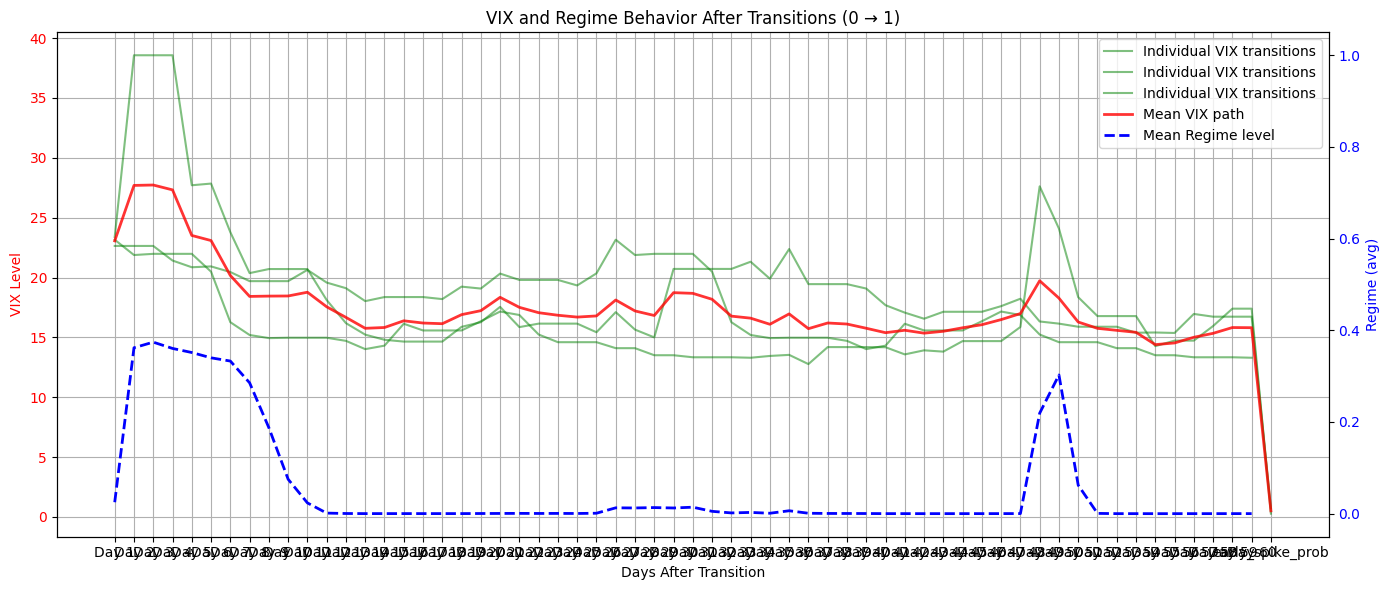

In [492]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Primary axis: VIX transitions
ax1 = plt.gca()
ax1.plot(vix_windows_df_test.T, color="green", alpha=0.5, label="Individual VIX transitions")
ax1.plot(vix_windows_df_test.mean(axis=0).values, color="red",alpha=0.8, linewidth=2, label="Mean VIX path")
ax1.set_xlabel("Days After Transition")
ax1.set_ylabel("VIX Level", color="red")
ax1.tick_params(axis='y', labelcolor="red")
ax1.set_title("VIX and Regime Behavior After Transitions (0 → 1)")
ax1.grid(True)

# Secondary axis: Regime values
ax2 = ax1.twinx()
ax2.plot(regime_windows_df_test.mean(axis=0).values, color="blue", linewidth=2, linestyle="--", label="Mean Regime level")
ax2.set_ylabel("Regime (avg)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylim(-0.05, 1.05)  # Because regime is binary

# Combined legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper right")

plt.tight_layout()
plt.show()



In [493]:
vix_windows_df_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-08-01,23.389999,38.570000,38.570000,38.57,27.709999,27.85,23.790001,20.370001,20.709999,20.709999,...,15.890000,15.890000,15.390000,15.41,15.37,16.959999,16.73,16.73,16.73,0.7475
2024-10-04,22.639999,22.639999,22.639999,21.42,20.860001,20.93,20.459999,19.700001,19.700001,19.700001,...,14.600000,14.100000,14.100000,13.51,13.51,13.340000,13.34,13.34,13.30,NaN
2024-10-30,23.160000,21.879999,21.980000,21.98,21.980000,20.49,16.270000,15.200000,14.940000,14.970000,...,16.780001,16.780001,16.780001,14.27,14.73,14.730000,15.95,17.40,17.40,0.2750


In [494]:
df_delayed_spike_prob_test = macro_utils.clf_delayed_spike_prob(vix_windows_df_test, test_df, "vix_target")

In [495]:
vix_windows_df_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-08-01,23.389999,38.570000,38.570000,38.57,27.709999,27.85,23.790001,20.370001,20.709999,20.709999,...,15.890000,15.890000,15.390000,15.41,15.37,16.959999,16.73,16.73,16.73,0.7475
2024-10-04,22.639999,22.639999,22.639999,21.42,20.860001,20.93,20.459999,19.700001,19.700001,19.700001,...,14.600000,14.100000,14.100000,13.51,13.51,13.340000,13.34,13.34,13.30,NaN
2024-10-30,23.160000,21.879999,21.980000,21.98,21.980000,20.49,16.270000,15.200000,14.940000,14.970000,...,16.780001,16.780001,16.780001,14.27,14.73,14.730000,15.95,17.40,17.40,0.2750


In [496]:
df_delayed_spike_prob_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-08-01,23.389999,38.570000,38.570000,38.57,27.709999,27.85,23.790001,20.370001,20.709999,20.709999,...,15.890000,15.890000,15.390000,15.41,15.37,16.959999,16.73,16.73,16.73,0.7475
2024-10-04,22.639999,22.639999,22.639999,21.42,20.860001,20.93,20.459999,19.700001,19.700001,19.700001,...,14.600000,14.100000,14.100000,13.51,13.51,13.340000,13.34,13.34,13.30,NaN
2024-10-30,23.160000,21.879999,21.980000,21.98,21.980000,20.49,16.270000,15.200000,14.940000,14.970000,...,16.780001,16.780001,16.780001,14.27,14.73,14.730000,15.95,17.40,17.40,0.2750


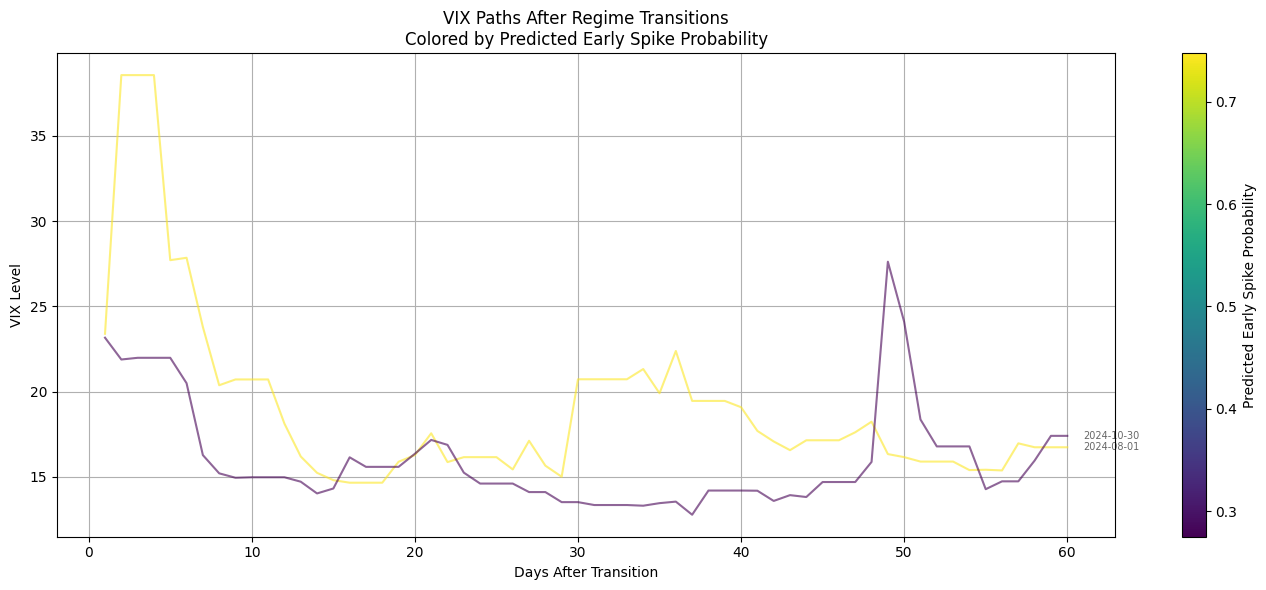

In [497]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter rows with predictions
df_plot = df_delayed_spike_prob_test.dropna(subset=["early_spike_prob"])

# Normalize probs for coloring
probs = df_plot["early_spike_prob"]
colors = cm.viridis((probs - probs.min()) / (probs.max() - probs.min()))

fig, ax = plt.subplots(figsize=(14, 6))

# Plot VIX paths, colored by classifier probability
for i, (date, row) in enumerate(df_plot.iterrows()):
    vix_path = row.iloc[:60]  # assumes 60-day VIX columns are first
    ax.plot(range(1, 61), vix_path.values, color=colors[i], alpha=0.6)
    ax.text(61, vix_path.values[-1], date.strftime("%Y-%m-%d"), fontsize=7, alpha=0.6, va="center")

# Add colorbar
sm = ScalarMappable(cmap="viridis", norm=Normalize(vmin=probs.min(), vmax=probs.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("Predicted Early Spike Probability")

# Labels and layout
ax.set_title("VIX Paths After Regime Transitions\nColored by Predicted Early Spike Probability")
ax.set_xlabel("Days After Transition")
ax.set_ylabel("VIX Level")
ax.grid(True)
plt.tight_layout()
plt.show()



In [498]:
vix_windows_df_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 52,Day 53,Day 54,Day 55,Day 56,Day 57,Day 58,Day 59,Day 60,early_spike_prob
transition_time,,,,,,,,,,,,,,,,,,,,,
2024-08-01,23.389999,38.570000,38.570000,38.57,27.709999,27.85,23.790001,20.370001,20.709999,20.709999,...,15.890000,15.890000,15.390000,15.41,15.37,16.959999,16.73,16.73,16.73,0.7475
2024-10-04,22.639999,22.639999,22.639999,21.42,20.860001,20.93,20.459999,19.700001,19.700001,19.700001,...,14.600000,14.100000,14.100000,13.51,13.51,13.340000,13.34,13.34,13.30,NaN
2024-10-30,23.160000,21.879999,21.980000,21.98,21.980000,20.49,16.270000,15.200000,14.940000,14.970000,...,16.780001,16.780001,16.780001,14.27,14.73,14.730000,15.95,17.40,17.40,0.2750


In [499]:
# =============================================================
# 0)  PREP  –  make sure the raw news DataFrame is date‑indexed
# =============================================================
news_test = test_df.copy()                       # original df you posted   # string/ts column → index
news_test = news_test.sort_index()                     # chronological order

# =============================================================
# 1)  ENGINEER EXTRA NEWS FEATURES (text‑only)
# =============================================================
def engineer_news_feats(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()

    # --- positive / negative ratios and range (max‑min) ---
    for prefix in ['summary', 'headline', 'overall']:
        pos = f'{prefix}_pos_count'
        neg = f'{prefix}_neg_count'
        tot = f'{prefix}_tot_count'

        out[tot] = out[[pos, neg]].sum(axis=1).replace(0, 1)      # avoid ÷0
        out[f'{prefix}_pos_ratio'] = out[pos] / out[tot]
        out[f'{prefix}_neg_ratio'] = out[neg] / out[tot]
        out[f'{prefix}_range']     = out[f'{prefix}_max'] - out[f'{prefix}_min']

    # --- one‑hot encode sentiment dominance flag -------------
    dom_dummies = pd.get_dummies(out['dominance_trigger'], prefix='dom')
    out = pd.concat([out, dom_dummies], axis=1)

    # OPTIONAL: drop the raw *_tot_count columns
    out = out.drop(columns=[c for c in out.columns if c.endswith('_tot_count')])
    return out

news_feats_test = engineer_news_feats(news_test)

# =============================================================
# 2)  DENSE DAILY INDEX  (forward‑fill missing dates)
# =============================================================
news_feats_test.index = pd.to_datetime(news_feats_test.index).normalize()        # 00:00:00
dense_idx = pd.date_range(news_feats_test.index.min(),
                          news_feats_test.index.max(),
                          freq='D')

news_dense_test = (
    news_feats_test
      .reindex(dense_idx)      # insert weekends / holidays
      .ffill()                 # carry last known sentiment forward
)



/var/folders/8z/8s3q7km56flcrw0wjltczryh0000gn/T/ipykernel_9552/1853403672.py:45: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .ffill()                 # carry last known sentiment forward


In [500]:
# ------------------------------------------------------------
# 3)  BUILD ARC‑LEVEL TABLE  (robust to missing news dates)
# ------------------------------------------------------------
records = []
for dt, row in vix_windows_df_test.iterrows():
    v = row[[f'Day {i}' for i in range(1, 61)]].values
    start_idx, peak_idx = macro_utils.detect_spike_arc(v)
    start_val, peak_val = v[start_idx], v[peak_idx]
    rise_dur            = peak_idx - start_idx
    decay_idx           = np.argmax(v[peak_idx:] < 0.5 * peak_val)
    half_life           = decay_idx if decay_idx > 0 else len(v) - peak_idx

    dt_norm = pd.to_datetime(dt).normalize()

    # -------- safe fetch of nearest‑past news features --------
    try:
        feats_on_start = news_dense.loc[:dt_norm].iloc[-1].to_dict()
    except IndexError:
        # no prior news available – skip this arc
        continue

    records.append({
        "date_start": dt_norm,
        "peak_vix":  peak_val,
        "vix0":      start_val,
        "P_rel":     peak_val / start_val - 1,
        "T_up":      rise_dur,
        "T_half":    half_life,
        **feats_on_start
    })

arc_df_test = (
    pd.DataFrame(records)
      .set_index("date_start")
      .astype(float, errors="ignore")
)

print("arc_df shape:", arc_df.shape)
print(arc_df_test.head(3).T)


arc_df shape: (10, 39)
date_start                     2024-08-01           2024-10-04  \
peak_vix                            38.57                23.16   
vix0                            23.389999            18.030001   
P_rel                            0.648995             0.284526   
T_up                                  1.0                 13.0   
T_half                               10.0                 34.0   
Unnamed: 0                         1496.0               1496.0   
date                  2023-12-31 00:00:00  2023-12-31 00:00:00   
summary_mean                     -0.08967             -0.08967   
summary_min                     -0.974704            -0.974704   
summary_max                      0.945365             0.945365   
summary_pos_count                   109.0                109.0   
summary_neg_count                    50.0                 50.0   
headline_mean                   -0.145494            -0.145494   
headline_min                    -0.972214            

In [501]:
arc_df_test = arc_df_test.drop(columns=['date', 'Unnamed: 0'], axis=1)

In [486]:
# ============================================================
# 0)  CONFIG & IMPORTS
# ============================================================
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import TimeSeriesSplit, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

target_cols   = ["peak_vix", "T_up", "T_half"]
feature_cols  = arc_df_test.columns.difference(target_cols)

mlp_params = dict(
    hidden_layer_sizes=(2000, 1000, 500),
    activation="relu",
    learning_rate_init=0.001,   # ↑ a bit
    alpha=1e-4,                # much weaker L2
    max_iter=3000,
    batch_size="auto",
    early_stopping=False,      # let it run full epochs
    random_state=42,
)

# ============================================================
# 1)  INPUT MATRICES & CV SPLIT
# ============================================================
X_full = arc_df_test[feature_cols].values
y_full = arc_df_test[target_cols].values
tscv   = TimeSeriesSplit(n_splits=2)

mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# ============================================================
# 2)  TRAIN PER‑TARGET WITH y‑SCALING
# ============================================================
models, cv_mae = {}, {}

for i, col in enumerate(target_cols):
    y = y_full[:, i]

    # pipeline: X‑scaler → MLP, plus y‑scaler wrapper
    base_pipe = Pipeline([
        ("scale_X", StandardScaler()),
        ("mlp",     MLPRegressor(**mlp_params)),
    ])
    pipe = TransformedTargetRegressor(
        regressor=base_pipe,
        transformer=StandardScaler()     # scales y
    )

    # walk‑forward CV
    cv = cross_validate(pipe, X_full, y,
                        cv=tscv,
                        scoring=mae_scorer,
                        n_jobs=-1,
                        return_train_score=False)
    cv_mae[col] = -cv["test_score"].mean()
    print(f"{col:8s} | MAE (5-fold): {cv_mae[col]:.3f}")

    # fit on all data & save
    pipe.fit(X_full, y)
    models[col] = pipe
    joblib.dump(pipe, f"mlp_{col}_test.pkl")

print("\nSaved pickled models:", [f"mlp_{c}_test.pkl" for c in target_cols])

# ============================================================
# 3)  HELPER FOR NEW PREDICTIONS
# ============================================================
def predict_new_arc(row_df: pd.DataFrame):
    """
    row_df: DataFrame with one row and the same feature columns.
    returns dict {target: prediction}
    """
    preds = {col: float(models[col].predict(row_df[feature_cols].values))
             for col in target_cols}
    return preds

# Example:
# new_row = arc_df.iloc[[-1]]
# print(predict_new_arc(new_row))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

peak_vix | MAE (5-fold): 11.503
T_up     | MAE (5-fold): 9.215
T_half   | MAE (5-fold): 15.570

Saved pickled models: ['mlp_peak_vix_test.pkl', 'mlp_T_up_test.pkl', 'mlp_T_half_test.pkl']


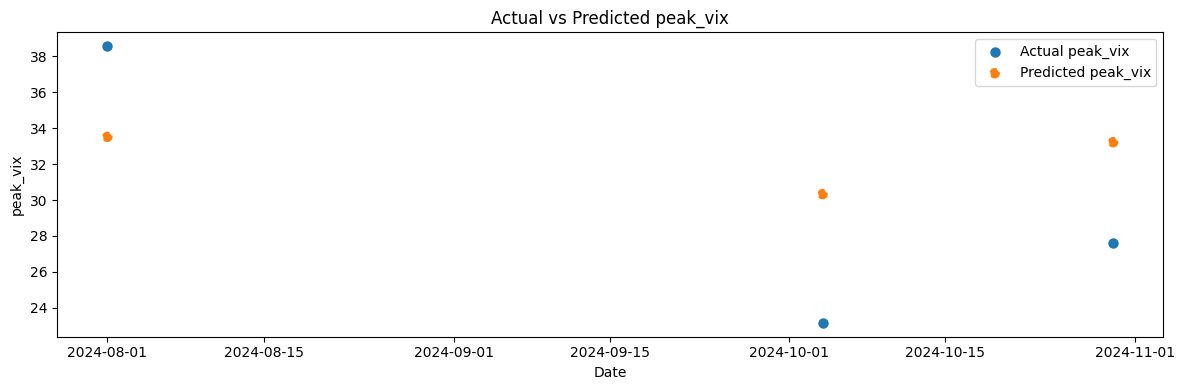

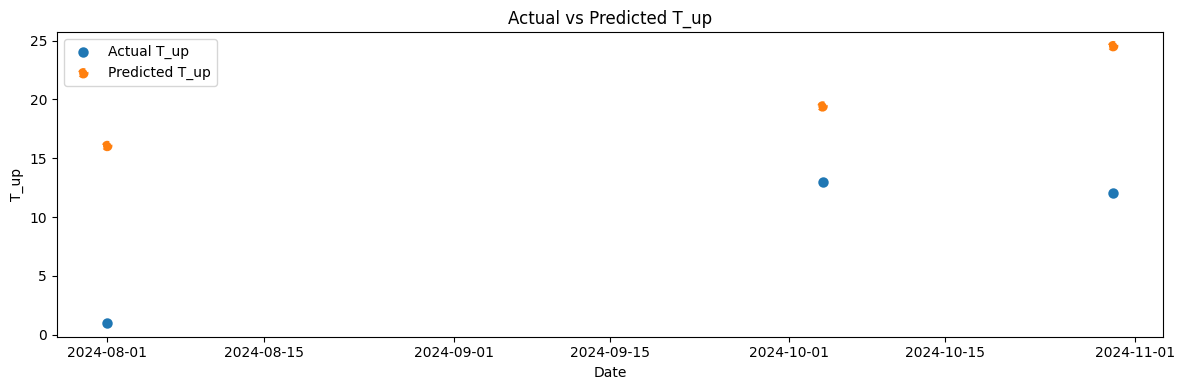

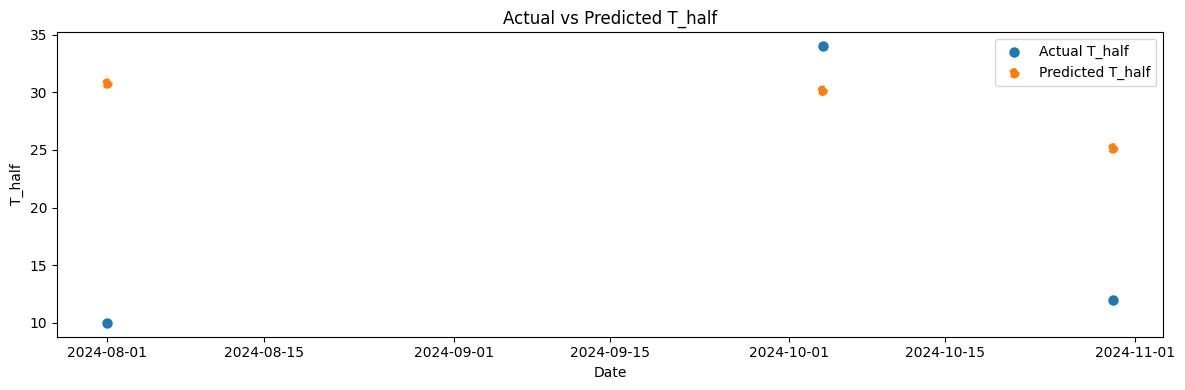

In [502]:
import joblib, matplotlib.pyplot as plt

feature_cols = arc_df_test.columns.difference(["peak_vix", "T_up", "T_half"])
X_full_test       = arc_df_test[feature_cols].values
dates        = arc_df_test.index         # x‑axis

models = {
    "peak_vix": joblib.load("mlp_peak_vix.pkl"),
    "T_up":     joblib.load("mlp_T_up.pkl"),
    "T_half":   joblib.load("mlp_T_half.pkl"),
}

for target, model in models.items():
    y_true_test = arc_df_test[target].values
    y_pred_test = model.predict(X_full_test)

    plt.figure(figsize=(12, 4))
    plt.scatter(dates, y_true_test, label=f"Actual {target}", linewidth=1.5)
    plt.scatter(dates, y_pred_test, label=f"Predicted {target}", linestyle="--", linewidth=1.5)
    plt.title(f"Actual vs Predicted {target}")
    plt.xlabel("Date")
    plt.ylabel(target)
    plt.legend()
    plt.tight_layout()
    plt.show()


# RECENT/TRADE